In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from sklearn.preprocessing import MinMaxScaler
import torch

import matplotlib.pyplot as plt

from SIPR import SIPR


data_path = 'SIPR/index_data/'
res_path = 'SIPR/res/'


In [ ]:
def train_recognition_module(
    data, dataname=None,
    n_clusters=12,
    l_min=12, l_max=16,
    max_iters=100,
    init_strategy='kmeans++',
    barycenter='dba', gamma=0.5,
    plot_progress=True,
    plot_loss=True,
    store_res=True
    ):
  
  # Run SIPR
  sipr = SIPR(n_clusters, l_min, l_max, gamma)
  sipr.fit(series=data, 
           max_iters=max_iters,
           init_strategy=init_strategy, 
           barycenter=barycenter,
           plot_progress=plot_progress,
           store_res=store_res, dataname=dataname)
  centroids = sipr.centroids
  labels = sipr.labels
  subsequences = sipr.subsequences
  segmentation = sipr.segmentation

  # Save results
  if store_res:
    df_centroids = pd.DataFrame(centroids)
    df_labels = pd.DataFrame(labels)
    df_subsequences = pd.DataFrame(subsequences)
    df_segmentation = pd.DataFrame(segmentation)
    dict_init = {'kmeans++': 'kmpp',
                 'random_sample': 'rs',
                 'random_noise': 'rn',
                 'reference':'ref'}
    filename = f"sipr_{dataname}_k{n_clusters}_l{l_min}-{l_max}_{barycenter[:4]}_{dict_init[init_strategy]}"
    df_centroids.to_csv(res_path + filename + '_centroids.csv')
    df_labels.to_csv(res_path + filename + '_labels.csv')
    df_subsequences.to_csv(res_path + filename + '_subsequences.csv')
    df_segmentation.to_csv(res_path + filename + '_segmentation.csv')
  
  # Plot training loss
  if plot_loss:
    hist_loss = np.array(sipr.hist_loss)
    plt.figure(figsize=(4,2))
    plt.plot(hist_loss, label='total_loss')
    plt.legend(loc='upper right')

  return centroids, labels, subsequences, segmentation



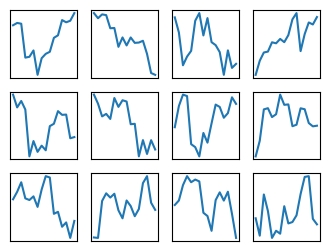

  0%|          | 0/100 [00:00<?, ?it/s]

-- Iter 1 --
Total Loss: 108.19533613325515


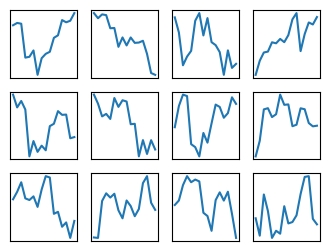

-- Iter 10 --
Total Loss: 98.72152553449928


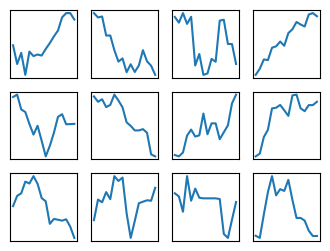

-- Iter 20 --
Total Loss: 98.40795744733288


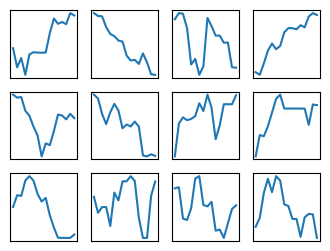

-- Iter 30 --
Total Loss: 97.01518761405904


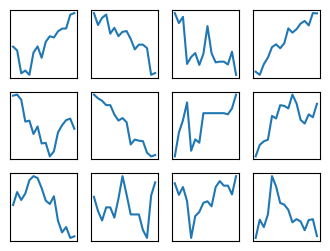

-- Iter 40 --
Total Loss: 94.98469241261057


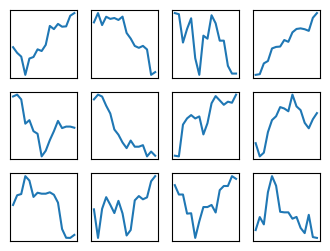

-- Iter 50 --
Total Loss: 93.79297618787609


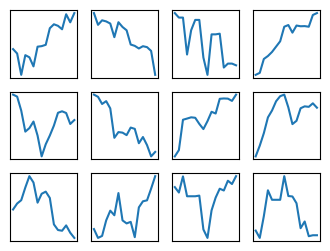

-- Iter 60 --
Total Loss: 97.34470591990275


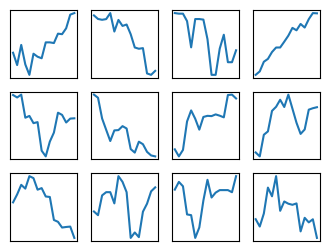

-- Iter 70 --
Total Loss: 99.09750537882196


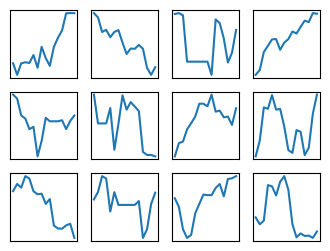

-- Iter 80 --
Total Loss: 101.94292075840907


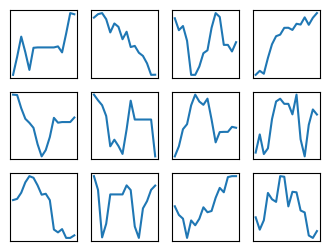

-- Iter 90 --
Total Loss: 95.65778573397289


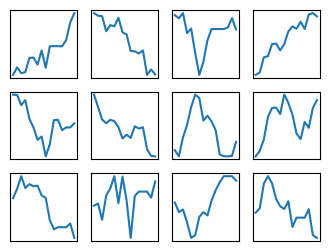

-- Iter 100 --
Total Loss: 95.83617925946783


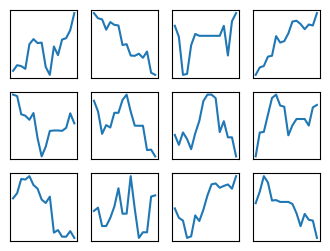

(array([[0.15034353061667277, 0.3707535705421554, 0.2735018141398066,
         0.5168350350887828, 0.530125788558571, 0.530125788558571,
         0.6438817493457805, 0.5294033337518681, 0.11729317110740616,
         0.4343056730461832, 0.6280235288927064, 0.6174770182855711,
         0.6897455794333606, 0.6869310164868887, 0.9870548813183669,
         0.9282524421640703],
        [0.9640706073464378, 0.9258623542440801, 0.773041063180983,
         0.864241653382621, 0.7912616672985082, 0.7168016513204483,
         0.5611508623945772, 0.3750708578308877, 0.41007144963698877,
         0.3486532302322735, 0.35930821499920684, 0.30234263693199853,
         0.31141330661097283, 0.38222717595372013, 0.0952841076810264,
         0.038374117065258506],
        [0.8410142940377101, 0.7541315306751857, 0.1471593989545062,
         0.39467384399853606, 0.6731896271755861, 0.38386650064735683,
         0.36143388079703376, 0.5151727037455542, 0.20709307225188606,
         0.4728479736610025, 0.447

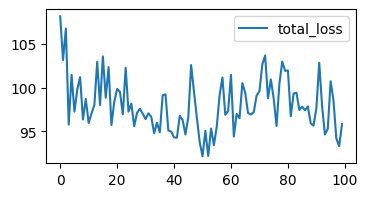

In [ ]:
zz_df = pd.read_csv('SIPR/index_data/zz500_index.csv',index_col=False)
df = zz_df['close'].values
train_recognition_module(df,dataname ='zz500')
